**Import Libraries**

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

**Data**

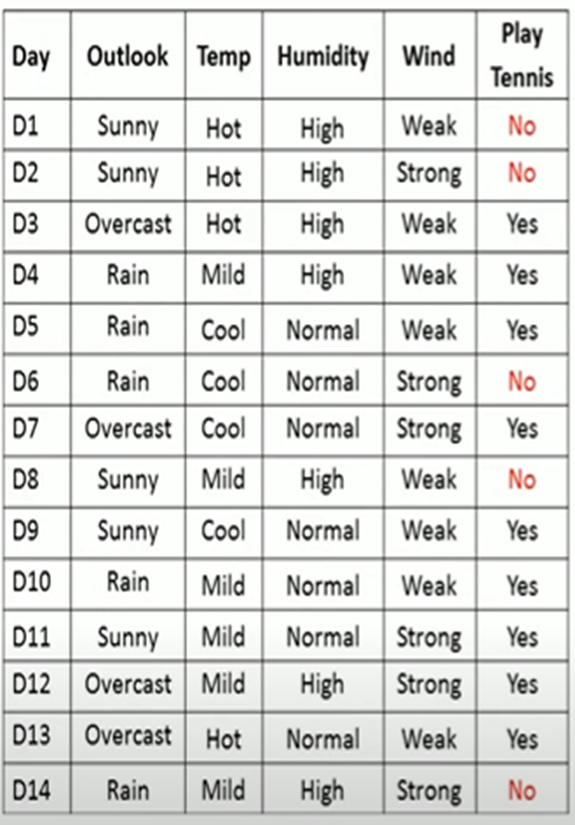

In [ ]:
# prompt: read the csv file from the link https://drive.google.com/file/d/1bcQmRGN3Ig3AGeDACqMc3wayXaw4-b53/view?usp=sharing

import pandas as pd

# Download the CSV file from Google Drive
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1bcQmRGN3Ig3AGeDACqMc3wayXaw4-b53' -O data.csv

# Read the CSV file into a pandas DataFrame
try:
    df = pd.read_csv('data.csv')
    print(df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please ensure the file was downloaded correctly.")
except pd.errors.ParserError:
    print("Error: Could not parse 'data.csv'. Check if it is a valid CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--2024-10-30 09:40:14--  https://drive.google.com/uc?export=download&id=1bcQmRGN3Ig3AGeDACqMc3wayXaw4-b53
Resolving drive.google.com (drive.google.com)... 173.194.217.100, 173.194.217.113, 173.194.217.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bcQmRGN3Ig3AGeDACqMc3wayXaw4-b53&export=download [following]
--2024-10-30 09:40:14--  https://drive.usercontent.google.com/download?id=1bcQmRGN3Ig3AGeDACqMc3wayXaw4-b53&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 423 [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>]     423  --.-KB/s    in 0s    

In [ ]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Assuming your data is in a pandas DataFrame called 'df'
# and the last column is named 'y'

X = df.drop('play', axis=1)
y = df['play']
# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate over each column in X and encode if it's of type 'object' (string)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])


In [ ]:
X

,outlook,temp,humidity,windy
0,2,1,0,False
1,2,1,0,True
2,0,1,0,False
3,1,2,0,False
4,1,0,1,False
5,1,0,1,True
6,0,0,1,True
7,2,2,0,False
8,2,0,1,False
9,1,2,1,False


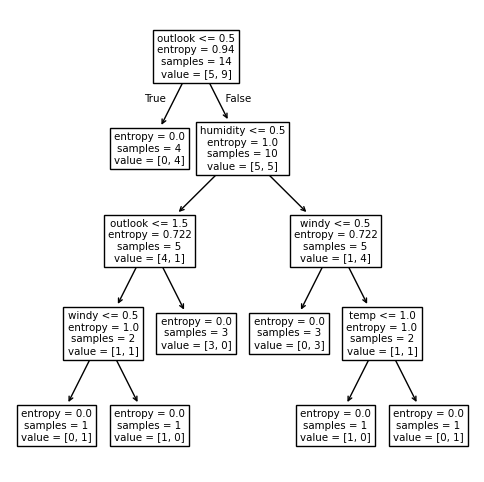

In [ ]:
# Example usage with a decision tree classifier:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
#plot decision tree
fig, ax = plt.subplots(figsize=(6, 6)) #figsize value changes the size of plot
tree.plot_tree(clf,ax=ax,feature_names=X.columns)
plt.show()

In [ ]:
# make predictions
predictions = clf.predict([[1, 2, 0, True]])
print(predictions)

['no']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
